In [1]:
pwd

'/Users/surajpawar/Desktop/Mobile Net'

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

2023-08-13 13:16:14.281616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [4]:
def prepare_image(file):
    img_path = "/Users/surajpawar/Desktop/Mobile Net/"
    img = image.load_img(img_path + file, target_size = (224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis =0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

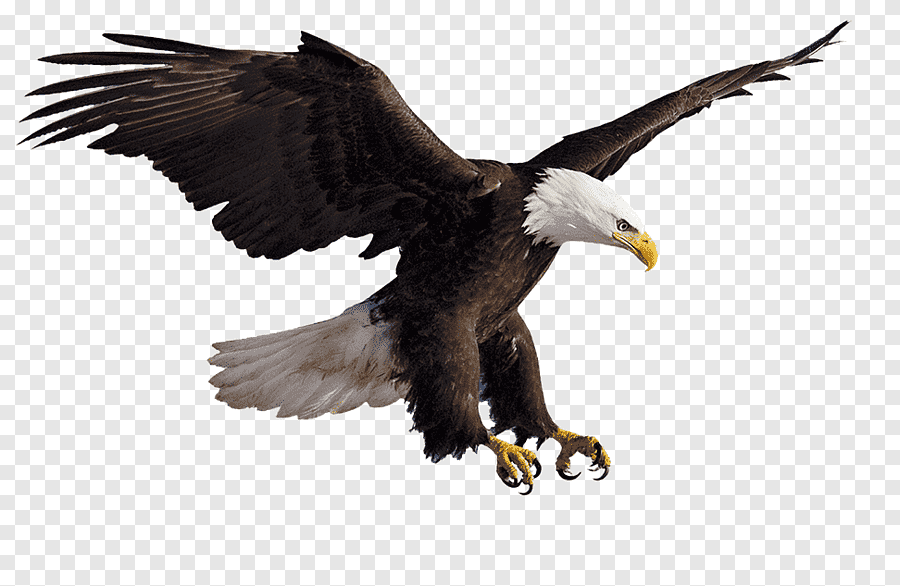

In [6]:
from IPython.display import Image
Image(filename = "/Users/surajpawar/Desktop/Mobile Net/1.png", width = 300, height = 200)

In [7]:
preprocessed_image = prepare_image("1.png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 1us/step


[[('n01614925', 'bald_eagle', 0.80823606),
  ('n01608432', 'kite', 0.18820092),
  ('n01616318', 'vulture', 0.0020680928),
  ('n01843383', 'toucan', 0.0006109115),
  ('n01829413', 'hornbill', 0.00027079319)]]

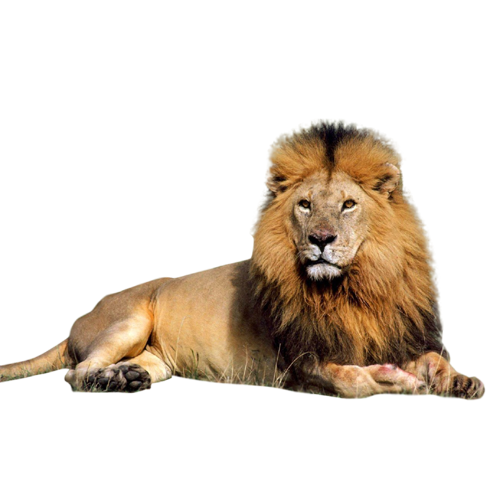

In [10]:
Image(filename = "/Users/surajpawar/Desktop/Mobile Net/2.png", width = 300, height = 200)

In [11]:
preprocessed_image = prepare_image("2.png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 50ms/step


[[('n02129165', 'lion', 0.9557784),
  ('n02119022', 'red_fox', 0.011796988),
  ('n02112137', 'chow', 0.0059889564),
  ('n02120079', 'Arctic_fox', 0.004677817),
  ('n02389026', 'sorrel', 0.003241376)]]

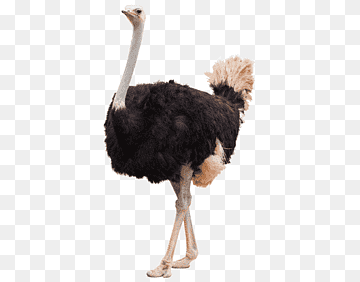

In [12]:
Image(filename = "/Users/surajpawar/Desktop/Mobile Net/3.png", width = 300, height =200)

In [13]:
preprocessed_image = prepare_image("3.png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 39ms/step


[[('n01518878', 'ostrich', 0.99767584),
  ('n02018795', 'bustard', 0.0013837157),
  ('n02095570', 'Lakeland_terrier', 0.00041021744),
  ('n02113624', 'toy_poodle', 8.627019e-05),
  ('n02013706', 'limpkin', 7.0073256e-05)]]

In [14]:
#Fine tuning

In [15]:
os.chdir('/Users/surajpawar/Desktop/Mobile Net/Sign-Language-Digits-Dataset-master')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [16]:
train_path = "/Users/surajpawar/Desktop/Mobile Net/Sign-Language-Digits-Dataset-master/train"
valid_path = "/Users/surajpawar/Desktop/Mobile Net/Sign-Language-Digits-Dataset-master/valid"
test_path ="/Users/surajpawar/Desktop/Mobile Net/Sign-Language-Digits-Dataset-master/test"

In [19]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = train_path, target_size = (224,224), batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = valid_path, target_size = (224,224), batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = test_path, target_size = (224,224), batch_size = 10)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [20]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [21]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [22]:
x = mobile.layers[-6].output
output = Dense(units = 10, activation='softmax')(x)

In [33]:
model = Model(inputs = mobile.input, outputs = output)

In [34]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
model.fit(x=train_batches,
            validation_data=valid_batches,
            epochs=10,
            verbose=2
)

In [41]:
test_labels = test_batches.classes

In [42]:
predictions = model.predict(x=test_batches, verbose=0)